In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv("netflix_titles.csv", index_col=False)

In [3]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (8807, 12)


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')
df['rating'] = df['rating'].fillna(0)

In [9]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
df_countries = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = df_countries.value_counts()
print(type(country_counts))
print(country_counts.head(10))

<class 'pandas.core.series.Series'>
country
United States     3690
India             1046
unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


In [11]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [12]:
(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64

In [13]:
print(df['country'].value_counts().head(5))

country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


In [14]:
print(df['release_year'].value_counts().head(10))

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

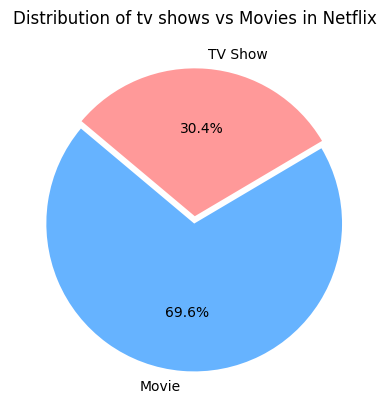

In [40]:
type_counts = df['type'].value_counts()
colors = ['#66b3ff', '#ff9999']

#plot
plt.Figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels= type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05, 0]
)
plt.title('Distribution of tv shows vs Movies in Netflix')
plt.savefig('plots/distribution_of_tv_shows_and_movies_piechart.png')
plt.show()


### Insights of the pie chart 
Movies constitute the majority of Netflix content, with TV Shows making up the remaining percentage.


In [61]:
df['country'] = df['country'].str.strip().str.title()                                       

In [ ]:
#filter the data
filtered_df = df[df['country'] != 'Unknown']

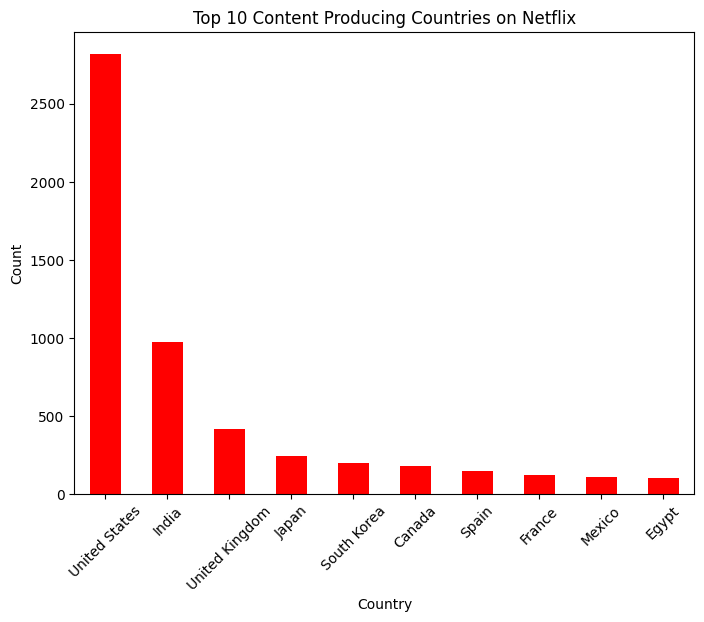

In [69]:
plt.figure(figsize=(8,6))
filtered_df['country'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('plots/bargraph_top_countries.png')
plt.show()


### Insights
- United states has the highest production of content 
- Mexico and egypt has lowest production of content 

In [18]:
#value counts for for top 20 release year with most content 
release_year_count = df['release_year'].value_counts().head(20)
release_year_count

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt 

In [20]:
release_year_count_sorted = release_year_count.sort_index()

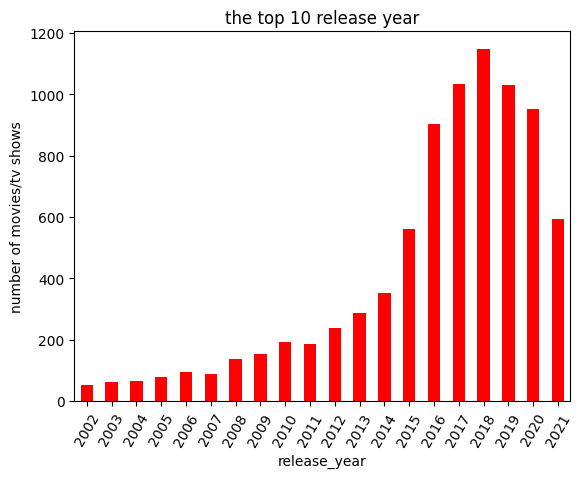

In [68]:
#plot
release_year_count_sorted.plot(kind='bar', color='red')
plt.title('the top 10 release year')
plt.xlabel('release_year')
plt.ylabel('number of movies/tv shows')
plt.xticks(rotation=60)
plt.savefig('plots/top_release_year_bargraph.png')
plt.show()

### Insights
- The year with the most content on Netflix is 2018
- There is a clear increase/decrease in content around 2020-2021
- Netflix consistently added content between the years shown, indicating trends in acquisition or production.


In [22]:
#top 10 genres 
listed_in_counts = df['listed_in'].value_counts().head(10)
listed_in_counts

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt 

In [24]:
listed_in_counts_sorted = listed_in_counts.sort_index()

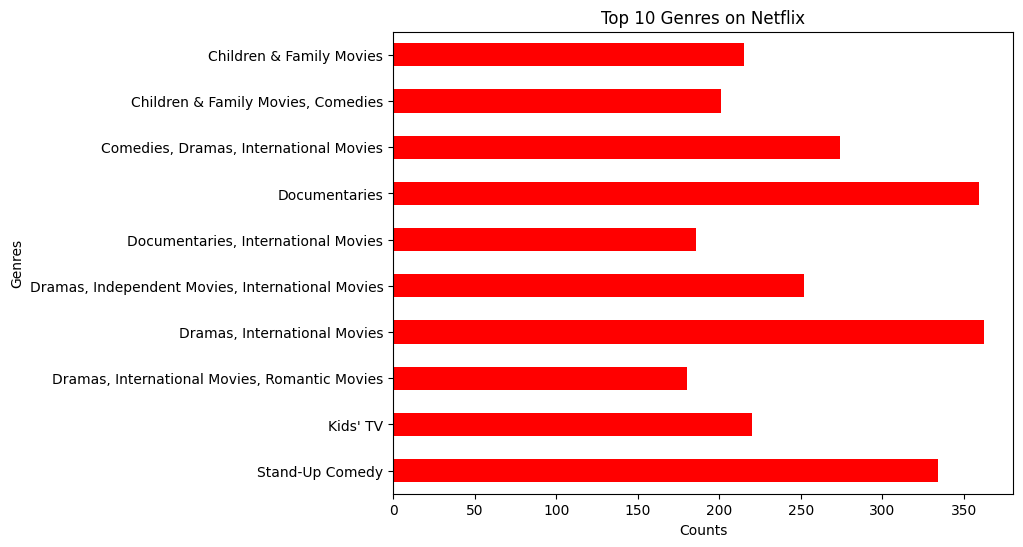

In [67]:
listed_in_counts_sorted.plot(kind='barh', color='red', figsize=(8,6))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Counts")
plt.ylabel("Genres")
plt.gca().invert_yaxis()
plt.savefig('plots/top_genres_horizontal_bargraph.png')
plt.show()


## insights 
- The genre with most content is dramas and international movies, indicating a strong demand for emotionally engaging content globally
- The genre with least content is romantic movies 

In [26]:
#seperate the movies 
movies_df = df[df['type'] =='Movie'].copy()
shows_df = df[df['type'] =='Shows'].copy()

In [27]:
valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-G', 'TV-PG','TV-14', 'TV-MA', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'NR', 'UR']

In [28]:
movies_df = movies_df[movies_df['rating'].isin(valid_ratings)]

In [29]:
movies_df['duration_clean'] = movies_df['duration'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anjal\AppData\Local\Temp\ipykernel_6020\1055921534.py:1: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_clean'] = movies_df['duration'].str.extract('(\d+)').astype(float)


In [30]:
rating_duration = movies_df.groupby('rating')['duration_clean'].mean().sort_values(ascending=False)
rating_duration

rating
NC-17       125.000000
TV-14       110.290820
PG-13       108.330612
R           106.720201
UR          106.333333
PG           98.282230
TV-MA        95.889913
TV-PG        94.851852
NR           94.533333
G            90.268293
TV-G         79.666667
TV-Y7-FV     68.400000
TV-Y7        66.287770
TV-Y         48.114504
Name: duration_clean, dtype: float64

In [31]:
import matplotlib.pyplot as plt

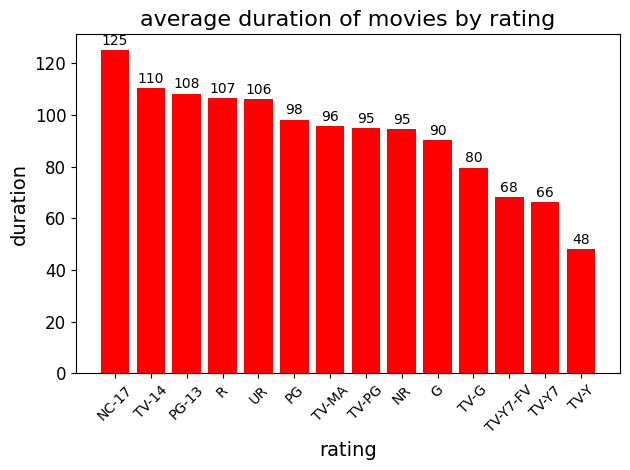

In [32]:
#barplot
plt.Figure(figsize=(12,6))
#labels and titles 
plt.bar(rating_duration.index, rating_duration.values, color='red')
plt.title('average duration of movies by rating', fontsize= 16)
plt.xlabel('rating', fontsize= 14)
plt.ylabel('duration',fontsize= 14 )
plt.xticks(rotation= 45)
plt.yticks(fontsize= 12)

for idx, val in enumerate(rating_duration.values):
    plt.text(idx, val + 2, f"{val:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('plots/avg_movie_duration_matplotlib.png')
plt.show()


### insights
- Movies rated ‘NC-17’ and ‘TV-14’ tend to have longer average durations compared to ‘TV-Y7’ or ‘TV-Y’ movies.
- Higher-rated movies often have more complex plots, possibly explaining longer durations.
- Family-friendly ratings (‘PG’, ‘G’, ‘TV-PG’) cluster around shorter durations (80-100 mins), catering to attention spans of younger audiences.

Insight for Netflix:
- If targeting binge-watchers, prioritize longer-duration, mature-rated films in recommendations.
- If optimizing for casual family watching, highlight shorter, lighter-rated movies in peak family hours.


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
numeric_cols = movies_df.select_dtypes(include='number')

In [ ]:
#compute correlation matrix
corr_matrix = numeric_cols.corr()

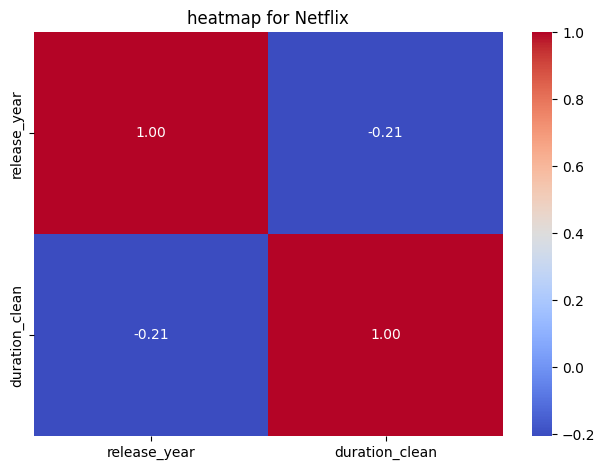

In [45]:
plt.Figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f")
plt.title('heatmap for Netflix')
plt.tight_layout()
plt.savefig('plots/heat_for_netflix_heatmap.png')
plt.show()

## Insights 
- A weak negative correlation (-0.21) indicates newer Netflix movies are slightly shorter on average, possibly reflecting changing viewer attention spans or mobile-first content strategies.

- This aligns with industry trends where platforms favor tighter runtimes to encourage binge consumption.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns 

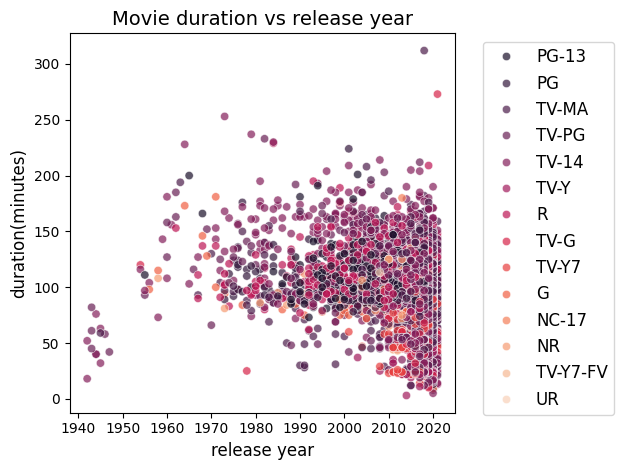

In [50]:
plt.Figure(figsize=(10,6))
sns.scatterplot(data= movies_df, x='release_year', y= 'duration_clean', hue='rating', alpha=0.7, palette='rocket', edgecolor= 'white')
plt.title('Movie duration vs release year', fontsize= 14)
plt.xlabel('release year', fontsize= 12)
plt.ylabel('duration(minutes)', fontsize= 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc= 'upper left', fontsize= 12)
plt.tight_layout()
plt.savefig('plots/scatterplot_movie_duration_and_release_year.png')
plt.show()

### Insights 
- Dense clustering post-2000 around 90–120 minutes.

- Fewer extreme outliers above 200 mins in recent years.

- Older movies (pre-1990) show wider duration variance, with many exceeding 150 mins.

- Ratings are spread across durations, but short films rarely have mature ratings 

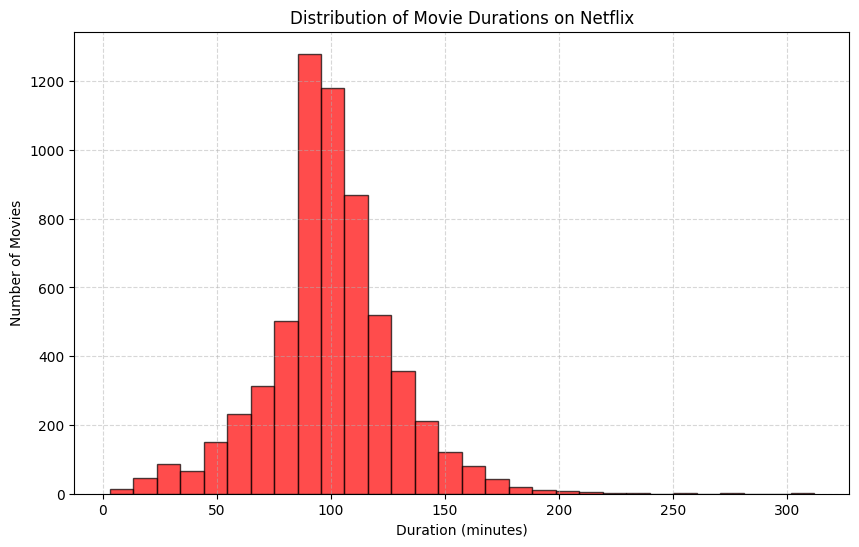

In [72]:
#plot for histogram 
plt.figure(figsize=(10,6))
plt.hist(movies_df['duration_clean'], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Insights
- The Netflix sweet spot is ~90–100 mins
That tallest bar (mode) around 90–100 mins, which indicates the audience prefer short movies more 
- Most movies are between 80–120 mins, showing Netflix favors standard feature-length content, not too short, not too long.
- positive skew
While most are 80–120 mins, some go 150, 180, even 200+, but these are rare. Netflix doesn’t use long epics often, keeping user attention spans in mind.
- <60 min movies exist but are rare
- Super long movies (200+ mins) are nearly non-existent
